In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X=df.iloc[:,3:-1]
Y=df.iloc[:,-1:]

In [7]:
X=pd.get_dummies(X, drop_first=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
X_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]]=sc.transform(X_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5981,-0.167362,-0.186511,0.688961,1.068892,0.795400,1,0,1.622056,1,0,0
3629,0.218259,0.862508,1.035914,0.627546,0.795400,0,0,-0.291701,0,0,0
8873,-0.417495,-0.472607,-1.739707,0.425568,-0.919748,0,0,0.449887,0,0,1
5099,-0.573828,0.576412,1.382866,0.471905,-0.919748,0,0,1.599809,1,0,0
2923,0.572613,0.194951,-0.351897,-0.068822,0.795400,1,1,0.744660,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9562,0.916546,0.004220,-0.004944,-1.226507,0.795400,1,1,0.253151,0,0,1
7925,-0.667627,-0.567972,0.688961,-1.226507,0.795400,1,1,1.194596,0,1,0
8495,0.478814,0.290316,-0.351897,-1.226507,-0.919748,0,0,0.462230,0,0,1
6811,1.343856,0.290316,-0.004944,-1.226507,0.795400,0,0,-1.292327,0,0,0


In [10]:
X_test.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]]=sc.transform(X_test.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
533,-1.115782,-0.377241,1.729819,-0.274618,-0.919748,1,0,-0.404196,0,1,1
6125,-1.553514,-0.472607,0.688961,0.267524,-0.919748,0,1,1.745846,1,0,0
5306,-0.469606,1.148604,1.382866,0.452048,-0.919748,1,1,1.147642,0,0,0
8634,0.947812,0.004220,-0.004944,-1.226507,-0.919748,0,1,-1.043212,0,0,1
2140,0.030659,0.194951,1.035914,0.420125,-0.919748,1,0,-0.773098,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5145,1.395966,-0.091145,-1.392754,0.992883,-0.919748,1,1,1.255889,1,0,1
9806,0.082770,-0.377241,1.382866,-0.075604,-0.919748,1,1,-0.555038,0,1,1
8109,0.114037,-0.472607,-1.739707,-1.226507,0.795400,1,0,1.496821,0,0,0
9850,-1.991246,-1.235529,-0.351897,1.174976,-0.919748,0,0,-0.871793,0,0,1


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model=Sequential()

In [31]:
model.add(Dense(units=6,activation="relu",input_dim=11))

In [32]:
model.add(Dense(units=6,activation="relu"))

In [33]:
model.add(Dense(units=1,activation="sigmoid"))

In [34]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [35]:
a=model.fit(X_train,Y_train,batch_size=10,epochs=30,validation_split=0.2,verbose=2)

Epoch 1/30
640/640 - 3s - loss: 0.5652 - accuracy: 0.7955 - val_loss: 0.4517 - val_accuracy: 0.8356 - 3s/epoch - 5ms/step
Epoch 2/30
640/640 - 1s - loss: 0.4186 - accuracy: 0.8339 - val_loss: 0.4251 - val_accuracy: 0.8256 - 1s/epoch - 2ms/step
Epoch 3/30
640/640 - 1s - loss: 0.4069 - accuracy: 0.8353 - val_loss: 0.4171 - val_accuracy: 0.8331 - 1s/epoch - 2ms/step
Epoch 4/30
640/640 - 1s - loss: 0.4033 - accuracy: 0.8363 - val_loss: 0.4172 - val_accuracy: 0.8288 - 1s/epoch - 2ms/step
Epoch 5/30
640/640 - 1s - loss: 0.4018 - accuracy: 0.8361 - val_loss: 0.4152 - val_accuracy: 0.8300 - 1s/epoch - 2ms/step
Epoch 6/30
640/640 - 1s - loss: 0.4001 - accuracy: 0.8372 - val_loss: 0.4148 - val_accuracy: 0.8344 - 1s/epoch - 2ms/step
Epoch 7/30
640/640 - 1s - loss: 0.3999 - accuracy: 0.8370 - val_loss: 0.4149 - val_accuracy: 0.8313 - 1s/epoch - 2ms/step
Epoch 8/30
640/640 - 1s - loss: 0.3995 - accuracy: 0.8361 - val_loss: 0.4148 - val_accuracy: 0.8338 - 1s/epoch - 2ms/step
Epoch 9/30
640/640 - 1s 

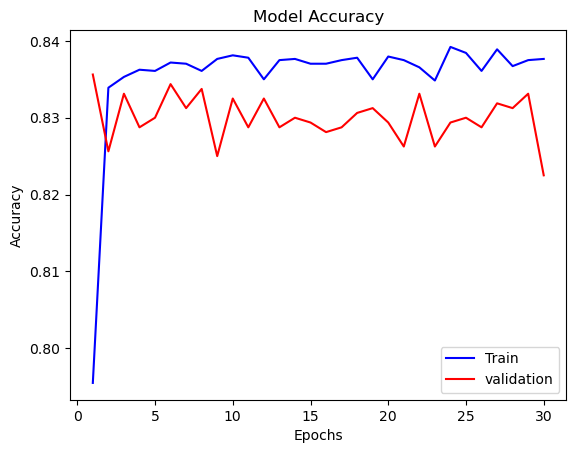

In [36]:

val_acc=a.history['val_accuracy']
acc=a.history['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

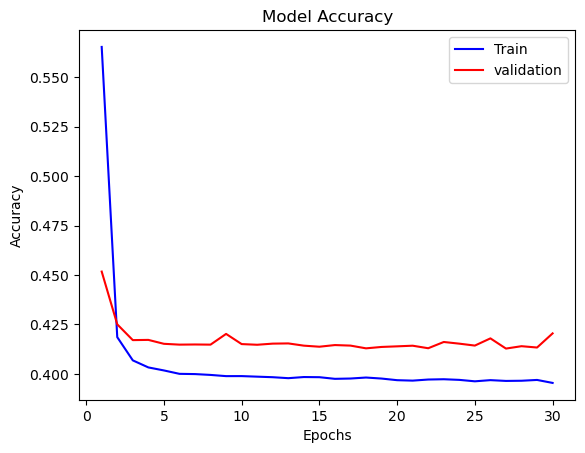

In [38]:
val_acc=a.history['val_loss']
acc=a.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

In [41]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [42]:
from sklearn.metrics import confusion_matrix

In [46]:
y_pred=(y_pred>0.5)

In [49]:
cm=confusion_matrix(Y_test,y_pred)

In [50]:
cm

array([[1563,   37],
       [ 294,  106]], dtype=int64)

In [54]:
accuracy=(1563+106)/2000
print("accuracy={}%".format(accuracy*100))

accuracy=83.45%


# Cross validation

In [57]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [58]:
def cross_validation():
    model=Sequential()
    model.add(Dense(units=6,activation="relu",kernel_initializer="uniform",input_dim=11))
    model.add(Dense(units=6,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=1,activation="sigmoid",kernel_initializer="uniform"))
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model


In [62]:
cross_model=KerasClassifier(build_fn=cross_validation,batch_size=10,epochs=10)
precision=cross_val_score(estimator=cross_model,X=X_train,y=Y_train)

Epoch 1/10


C:\Users\amria\AppData\Local\Temp\ipykernel_4788\1184736238.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cross_model=KerasClassifier(build_fn=cross_validation,batch_size=10,epochs=10)


640/640 [==============================] - 2s 2ms/step - loss: 0.4943 - accuracy: 0.7937
Epoch 2/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.7944
Epoch 3/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4146 - accuracy: 0.7944
Epoch 4/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.7944
Epoch 5/10
640/640 [==============================] - 2s 3ms/step - loss: 0.3956 - accuracy: 0.8183
Epoch 6/10
640/640 [==============================] - 2s 2ms/step - loss: 0.3856 - accuracy: 0.8322
Epoch 7/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8419
Epoch 8/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8467
Epoch 9/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3661 - accuracy: 0.8539
Epoch 10/10
160/160 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8394
Epoch 1/10

In [63]:
moyenne=precision.mean()
ecart_type=precision.std()
print("Moyenne={}, ecart-type={}".format(moyenne,ecart_type))

Moyenne=0.8238750100135803, ecart-type=0.009629057611062515


En cas de suraprentissage

from keras.layers import Dropout
model.add(Dropout(rate=0.1))

# Grid Search

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV